Hierarchical Clustering is an unsupervised machine learning technique used to group similar data points into clusters. Unlike K-Means, it doesn't require specifying the number of clusters in advance.

There are two main approaches:

Agglomerative (Bottom-Up): Each point starts as its own cluster and merges with others based on similarity.

Divisive (Top-Down): Starts with all points in one cluster and splits them recursively.
Hierarchial clusters is best for small datasets however k-means may be used for large datasets. Hierarchial clustering supports a varity of data. The visualization here is seen by the number of clusters formed through dendograms 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 

In [2]:
iris=datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [4]:
iris_data.columns=iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
x_scaled=scaler.fit_transform(iris_data)

In [8]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
from sklearn.decomposition import PCA


In [10]:
pca=PCA(n_components=2)

In [11]:
pca_scaled=pca.fit_transform(x_scaled)

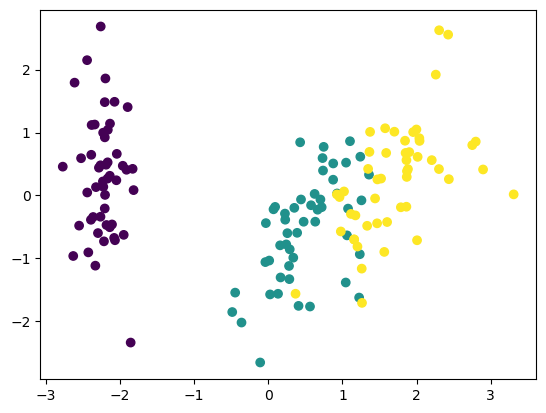

In [12]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

In [13]:
##agglomerative clustering 

In [14]:
%matplotlib inline


Text(0, 0.5, 'Eucledian distance')

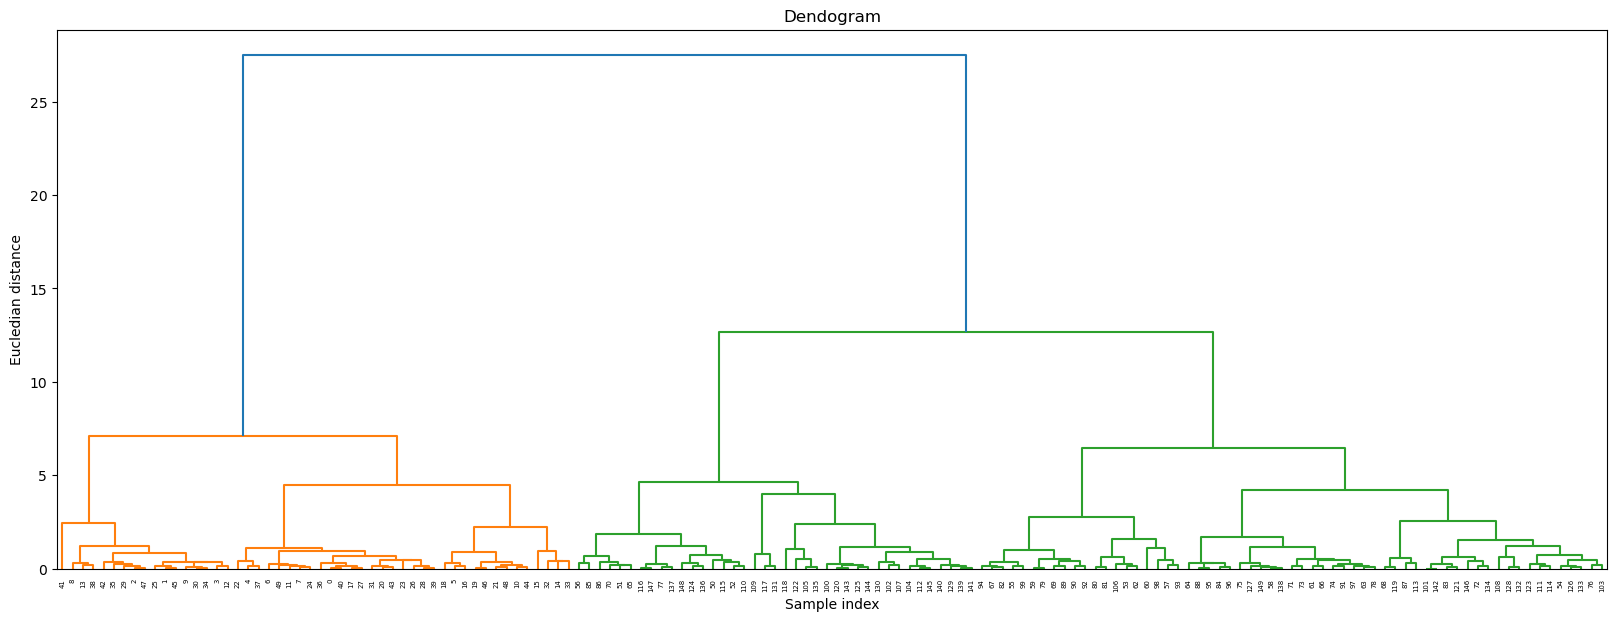

In [15]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20, 7))

plt.title("Dendograms")

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendogram")
plt.xlabel("Sample index")
plt.ylabel("Eucledian distance")

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)


AgglomerativeClustering()

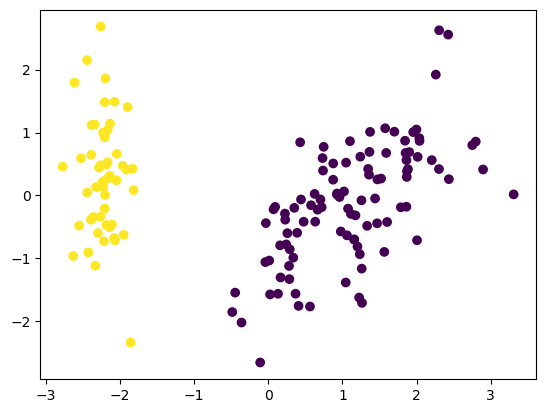

In [20]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)